In [24]:
import pandas as pd
import numpy as np
import csv
CustomerDF1 = pd.read_csv('F:/Zulu/My Btech/M L/Major Project/cust_transaction_details (1).csv',encoding='utf8' )
CustomerDF2 = pd.read_csv('F:/Zulu/My Btech/M L/Major Project/Customer_DF (1).csv',encoding='utf8' )

In [25]:
#Task 1:
#Exploratory analysis of the dataset.

In [26]:
CustomerDF1.head()#Transaction data of customers

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [4]:
CustomerDF2.head()#Customer detail table

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [5]:
#Note Customer table can have 1 customer 
#with 1 entries to reduce data duplication on merging tables
#Also customer table should have unique emails entries for better authorization
print("Repeated entries in customer table: ")
print(len(CustomerDF2["customerEmail"]))
print(CustomerDF2["customerEmail"].value_counts())
f=0
for ind in CustomerDF2.index:#"johnlowery@gmail.com" is a fraud customer repeated 8 times so reduced it to 1 
    if CustomerDF2["customerEmail"][ind]=="johnlowery@gmail.com":
        if f!=0:
            CustomerDF2.drop(ind,inplace=True)
        f=1
print("\nDealt with repetation!!")
print(len(CustomerDF2["customerEmail"]))
print(CustomerDF2["customerEmail"].value_counts())
temp=CustomerDF2

Repeated entries in customer table: 
168
johnlowery@gmail.com               8
suzanne21@gmail.com                1
davismike@hotmail.com              1
rbolton@hotmail.com                1
jonesandrea@gray.biz               1
                                  ..
ypruitt@hotmail.com                1
brandon58@conner.com               1
watkinscaroline@lewis-haas.com     1
mitchellvickie@brewer-jones.com    1
knichols@gmail.com                 1
Name: customerEmail, Length: 161, dtype: int64

Dealt with repetation!!
161
johnlowery@gmail.com               1
suzanne21@gmail.com                1
davismike@hotmail.com              1
rbolton@hotmail.com                1
jonesandrea@gray.biz               1
                                  ..
ypruitt@hotmail.com                1
brandon58@conner.com               1
watkinscaroline@lewis-haas.com     1
mitchellvickie@brewer-jones.com    1
knichols@gmail.com                 1
Name: customerEmail, Length: 161, dtype: int64


In [6]:
#paymemntmthodtype column's value
#No. of card payment type
x=CustomerDF1[CustomerDF1['paymentMethodType'] == 'card'].groupby('customerEmail')["paymentMethodType"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodType":"No. of card payment type"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of bitcoin payment type
x=CustomerDF1[CustomerDF1['paymentMethodType'] == 'bitcoin'].groupby('customerEmail')["paymentMethodType"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodType":"No. of bitcoin payment type"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of apple pay payment type
x=CustomerDF1[CustomerDF1['paymentMethodType'] == 'apple pay'].groupby('customerEmail')["paymentMethodType"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodType":"No. of apple pay payment type"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of paypal payment type
x=CustomerDF1[CustomerDF1['paymentMethodType'] == 'paypal'].groupby('customerEmail')["paymentMethodType"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodType":"No. of paypal payment type"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#PaymentProvider Column
#No. of times JCB 16 digit PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'JCB 16 digit'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times JCB 16 digit paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times American Express PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'American Express'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times American Express paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times VISA 16 digit PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'VISA 16 digit'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times VISA 16 digit paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times Discover PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'Discover'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times Discover paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times Voyager PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'Voyager'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times Voyager paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times VISA 13 digit PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'VISA 13 digit'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times VISA 13 digit paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times Maestro PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'Maestro'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times Maestro paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times Mastercard PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'Mastercard'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times Mastercard paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times Diners Club / Carte Blanche PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'Diners Club / Carte Blanche'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times Diners Club / Carte Blanche paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of times JCB 15 digit PaymentProvider used
x=CustomerDF1[CustomerDF1['paymentMethodProvider'] == 'JCB 15 digit'].groupby('customerEmail')["paymentMethodProvider"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodProvider":"No. of times JCB 15 digit paymentMethodProvider used"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#orderState Columns
#No. of pending orders
x=CustomerDF1[CustomerDF1['orderState'] == 'pending'].groupby('customerEmail')["orderState"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"orderState":"No. of pending orders"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of fulfilled orders
x=CustomerDF1[CustomerDF1['orderState'] == 'fulfilled'].groupby('customerEmail')["orderState"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"orderState":"No. of fulfilled orders"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#No. of failed orders
x=CustomerDF1[CustomerDF1['orderState'] == 'failed'].groupby('customerEmail')["orderState"].count()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"orderState":"No. of failed orders"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')


In [7]:
#Average Transaction amount
x=CustomerDF1.groupby('customerEmail')["transactionAmount"].mean()
x=pd.DataFrame(x,x.keys())
d=d.rename(columns={"transactionAmount":"Average Transaction amount"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#Total no. of Payment method registration failure 
x=CustomerDF1.groupby('customerEmail')["paymentMethodRegistrationFailure"].sum()
x=pd.DataFrame(x,x.keys())
d=d.rename(columns={"paymentMethodRegistrationFailure":"Total no. of Payment method registration failure"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#Total no. of failed transactions
x=CustomerDF1.groupby('customerEmail')["transactionFailed"].sum()
d=pd.DataFrame(x,x.keys())
d=d.rename(columns={"transactionFailed":"Total no. of failed transactions"})
CustomerDF2=pd.merge(CustomerDF2, d, on='customerEmail', how='left')
#Treatment of null values generated on adding columns fill null with zeros
CustomerDF2.fillna(0,inplace=True)
print(CustomerDF2.shape)


(161, 30)


In [8]:
#drop indexes of table, reducing unwanted columns
CustomerDF1.drop(['Unnamed: 0'],axis=1,inplace=True)
CustomerDF2.drop(['Unnamed: 0'],axis=1,inplace=True)
fraud=pd.DataFrame(CustomerDF2["Fraud"])
CustomerDF2.drop(['Fraud'],axis=1,inplace=True)
CustomerDF2["Fraud"]=fraud
print("-----------------------Main classes from Transaction table added to Customer Detail table----------------------- ")
CustomerDF2.head()

-----------------------Main classes from Transaction table added to Customer Detail table----------------------- 


,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,No. of card payment type,No. of bitcoin payment type,...,No. of times Mastercard paymentMethodProvider used,No. of times Diners Club / Carte Blanche paymentMethodProvider used,No. of times JCB 15 digit paymentMethodProvider used,No. of pending orders,No. of fulfilled orders,No. of failed orders_x,No. of failed orders_y,No. of failed orders,Total no. of failed transactions,Fraud
0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False
1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,True
2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,5.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,2.0,False
3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,3.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,False
4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,4.0,0.0,...,0.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,2.0,True


In [9]:
Main_table=temp
Main_table.drop(['Unnamed: 0'],axis=1,inplace=True)

In [23]:
#To join to tables
Main_table=pd.merge(CustomerDF1, temp, on='customerEmail', how='right')#applied right outer join because only those 
#Customers transaction details are required whose fraud or not fraud is known 
print(Main_table.shape)
Main_table.fillna(0,inplace=True)#Filling null values generated due to duplication with 0
Main_table.head()
print("---------------------------------------------MAIN TABLE FOR PREDICTION--------------------------------------------- ")
print("-----------------------Transaction table RIGHT INNER JOIN ON Customer Detail table---------------------- ")
Main_table.head()#The merged table to be used to model preparation

(648, 18)
---------------------------------------------MAIN TABLE FOR PREDICTION--------------------------------------------- 
-----------------------Transaction table RIGHT INNER JOIN ON Customer Detail table---------------------- 


,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1.0,card,JCB 16 digit,18.0,0.0,pending,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1.0,card,JCB 16 digit,26.0,0.0,fulfilled,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0.0,bitcoin,American Express,45.0,0.0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0.0,bitcoin,American Express,23.0,0.0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1.0,bitcoin,VISA 16 digit,43.0,1.0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True


In [11]:
#Task 2:
#Summary and explaination of the key trends in the data, with visualisations and tabular representations.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [13]:
#Count of fraud and not fraud customers grouped by payment method provider, payment method type and ordet state wise
grouped1 = Main_table.groupby('Fraud')
print("Number of not fraud and fraud customers with paymentMethodProvider wise: ")
print(grouped1['paymentMethodProvider'].value_counts())
print("\nNumber of not fraud and fraud customers with paymentMethodType wise: ")
grouped2 = Main_table.groupby('Fraud')
print(grouped2['paymentMethodType'].value_counts())
print("\nNumber of not fraud and fraud customers with orderState wise: ")
grouped3 = Main_table.groupby('Fraud')
print(grouped3['orderState'].value_counts())

Number of not fraud and fraud customers with paymentMethodProvider wise: 
Fraud  paymentMethodProvider      
False  JCB 16 digit                   67
       Maestro                        53
       VISA 16 digit                  51
       Diners Club / Carte Blanche    38
       JCB 15 digit                   31
       Voyager                        29
       American Express               28
       VISA 13 digit                  25
       Discover                       24
       0                              20
       Mastercard                     20
True   JCB 16 digit                   51
       VISA 16 digit                  45
       VISA 13 digit                  33
       Voyager                        32
       Diners Club / Carte Blanche    20
       American Express               17
       Discover                       17
       Maestro                        16
       JCB 15 digit                   14
       Mastercard                     12
       0                      

[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


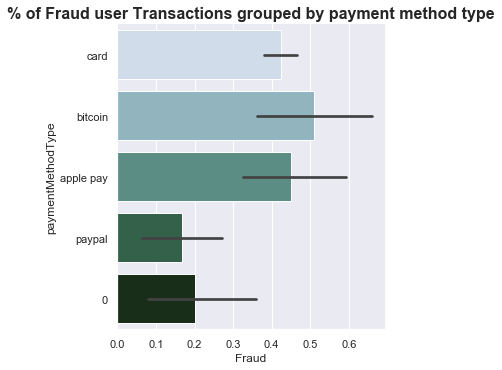

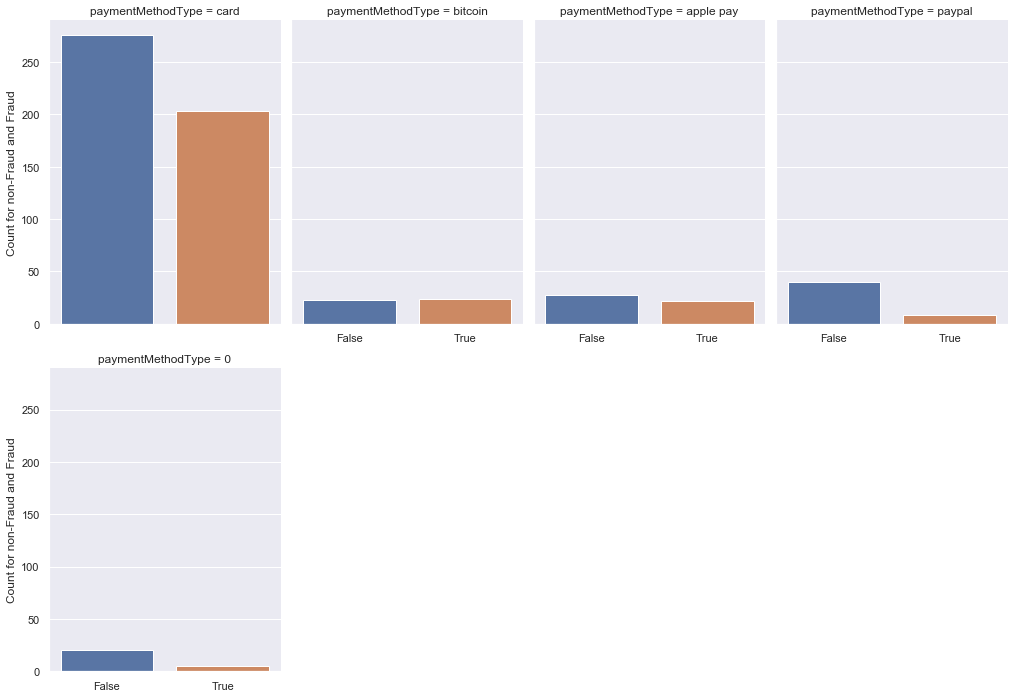

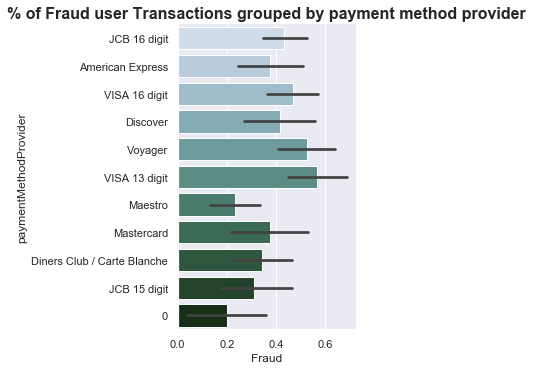

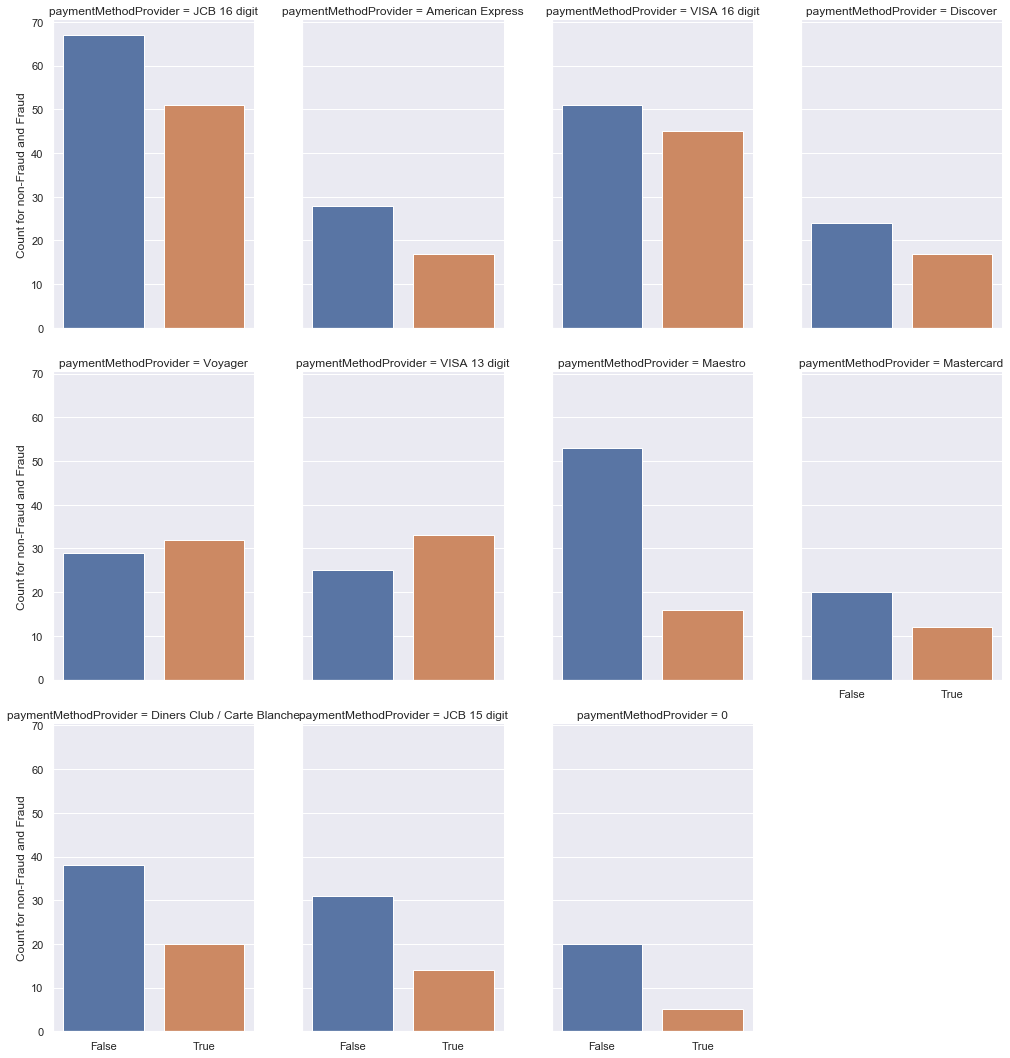

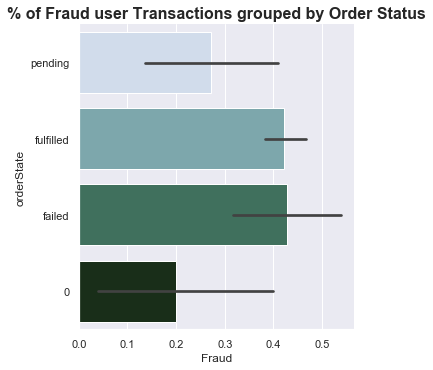

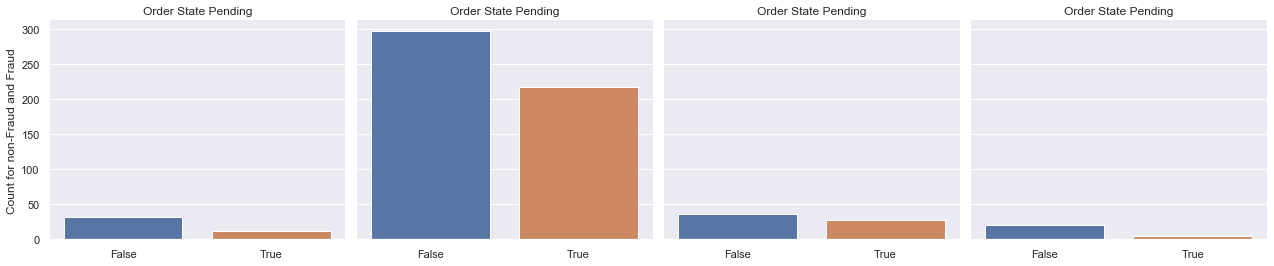

In [14]:
#Visualisation of same data given above with paymentMethodType, paymentMethodProvider and orderState
yaxis=list(np.linspace(0,100,num=11))
print(yaxis)
sns.catplot(x='Fraud',y="paymentMethodType", data=Main_table, kind='bar', palette="ch:10.75")
plt.title('% of Fraud user Transactions grouped by payment method type', weight='bold', fontsize=16)
plt.show()
g=sns.catplot("Fraud", col="paymentMethodType", col_wrap=4,data=Main_table,kind="count", height=5, aspect=.7)
g.set_axis_labels("", "Count for non-Fraud and Fraud")
plt.show()
sns.catplot(x='Fraud',y='paymentMethodProvider', data=Main_table, kind='bar',palette="ch:10.75")
plt.title('% of Fraud user Transactions grouped by payment method provider', weight='bold', fontsize=16)
plt.show()
g=sns.catplot("Fraud", col="paymentMethodProvider", col_wrap=4,data=Main_table,kind="count", height=5, aspect=.7)
g.set_axis_labels("", "Count for non-Fraud and Fraud")
sns.catplot(x='Fraud',y='orderState', data=Main_table, kind='bar',palette="ch:10.75")
plt.title('% of Fraud user Transactions grouped by Order Status', weight='bold', fontsize=16)
plt.show()
g=sns.catplot("Fraud", col="orderState", col_wrap=4,data=Main_table,kind="count", height=4, aspect=1.1)
g.set_titles("Order State Pending","Order State Fulfilled","Order state Failed")
g.set_axis_labels("", "Count for non-Fraud and Fraud")
plt.show()

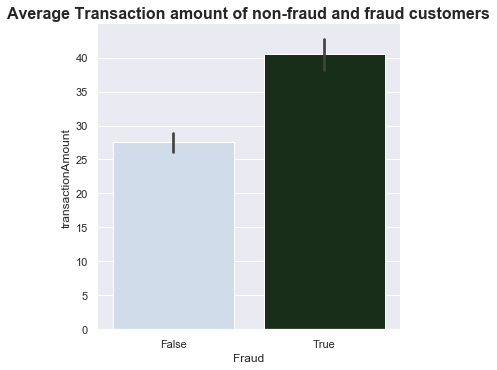

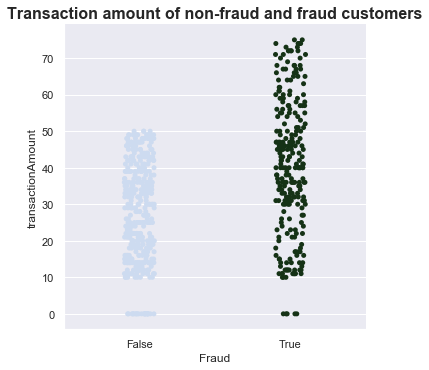

In [15]:
for ind in Main_table.index:
    if Main_table["transactionAmount"][ind]==353:#Removing the outlayer to fit data
        Main_table.drop(ind,inplace=True)
sns.catplot(x='Fraud',y='transactionAmount', data=Main_table, kind='bar',palette="ch:10.75")
plt.title('Average Transaction amount of non-fraud and fraud customers', weight='bold', fontsize=16)
plt.show()
sns.catplot(x='Fraud',y='transactionAmount', data=Main_table, palette="ch:10.75")
plt.title('Transaction amount of non-fraud and fraud customers', weight='bold', fontsize=16)
plt.show()

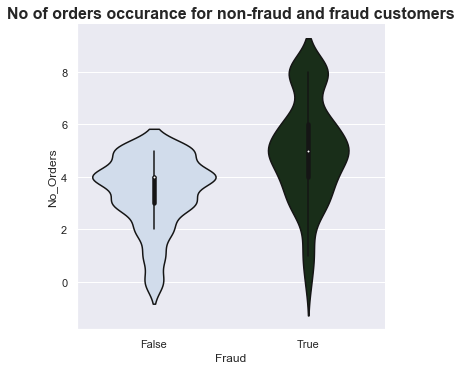

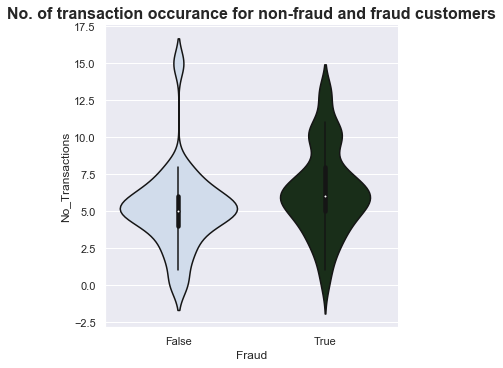

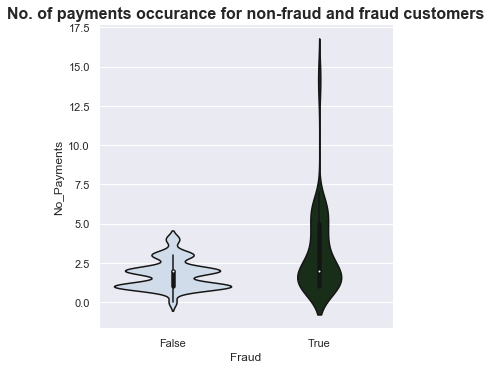

In [16]:
sns.catplot(x='Fraud',y='No_Orders', data=Main_table,kind="violin" ,palette="ch:10.75")
plt.title('No of orders occurance for non-fraud and fraud customers', weight='bold', fontsize=16)
plt.show()
sns.catplot(x='Fraud',y='No_Transactions', data=Main_table,kind="violin" ,palette="ch:10.75")
plt.title('No. of transaction occurance for non-fraud and fraud customers', weight='bold', fontsize=16)
plt.show()
sns.catplot(x='Fraud',y='No_Payments', data=Main_table,kind="violin",palette="ch:10.75")
plt.title('No. of payments occurance for non-fraud and fraud customers', weight='bold', fontsize=16)
plt.show()

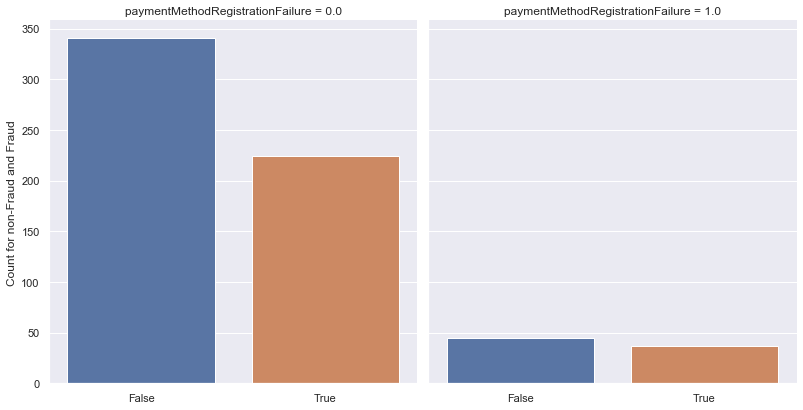

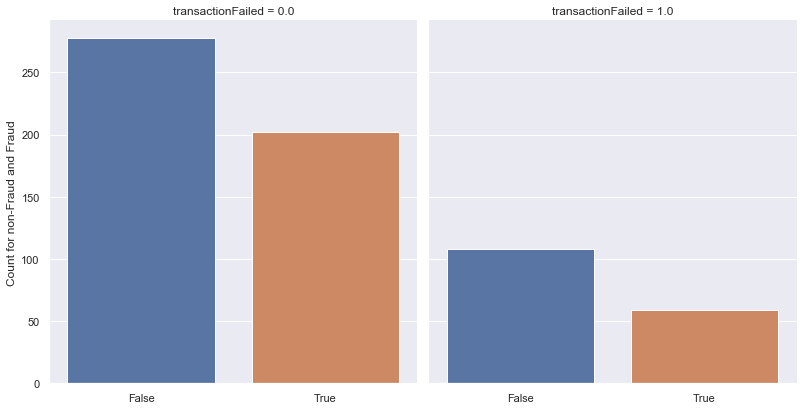

In [17]:
g=sns.catplot("Fraud", col="paymentMethodRegistrationFailure", col_wrap=4,data=Main_table,kind="count", height=6, aspect=.9)
g.set_axis_labels("", "Count for non-Fraud and Fraud")
plt.show()
g=sns.catplot("Fraud", col="transactionFailed", col_wrap=4,data=Main_table,kind="count", height=6, aspect=.9)
g.set_axis_labels("", "Count for non-Fraud and Fraud")
plt.show()

In [18]:
#set wd
#set wd
import os
os.getcwd()
os.chdir('F:\Zulu\My Btech\M L\Major Project')
os.getcwd()
#
import subprocess

#read data in-1
df = pd.DataFrame(Main_table)
#list(df)
ncol = len(df.axes[1])
nrow=len(df.axes[0])
print("-----------------------All the features of Merged Main Table and their datatypes----------------------- ")
print("%s x %s" % (nrow, ncol)) #check dimension 
print (df.dtypes) #check data types

# count freq
df.groupby('Fraud').count()

#convert object col to int64 and rename-2
n = ncol
for i in range(0,n):
       if (df.iloc[:,i].dtype==object):
        A= df.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(A)}
        df.iloc[:,i] = df.iloc[:,i].replace(map_to_int)
print (df.dtypes)


#first n-1 col as features, and the last one as target
df1=df.iloc[:,0:n]
features = list(df1.columns[:(n-1)])
print("* features:", features, sep="\n")
df1.rename(columns={'Fraud':'Target'}, inplace=True)
list(df1)
df1

y = df1["Target"]
X = df1[features]

-----------------------All the features of Merged Main Table and their datatypes----------------------- 
647 x 18
customerEmail                        object
transactionId                        object
orderId                              object
paymentMethodId                      object
paymentMethodRegistrationFailure    float64
paymentMethodType                    object
paymentMethodProvider                object
transactionAmount                   float64
transactionFailed                   float64
orderState                           object
customerPhone                        object
customerDevice                       object
customerIPAddress                    object
customerBillingAddress               object
No_Transactions                       int64
No_Orders                             int64
No_Payments                           int64
Fraud                                  bool
dtype: object
customerEmail                         int64
transactionId                       

In [19]:
#Task 3:
#Explaination of the factors that are significant and insignificant in contributing to fraud.

          ------------------------------------------ Correlation Matrix ------------------------------------------
Co-relation between features
(greenish implies low significance while the reddish implies high significance)
SEE Between target values and others


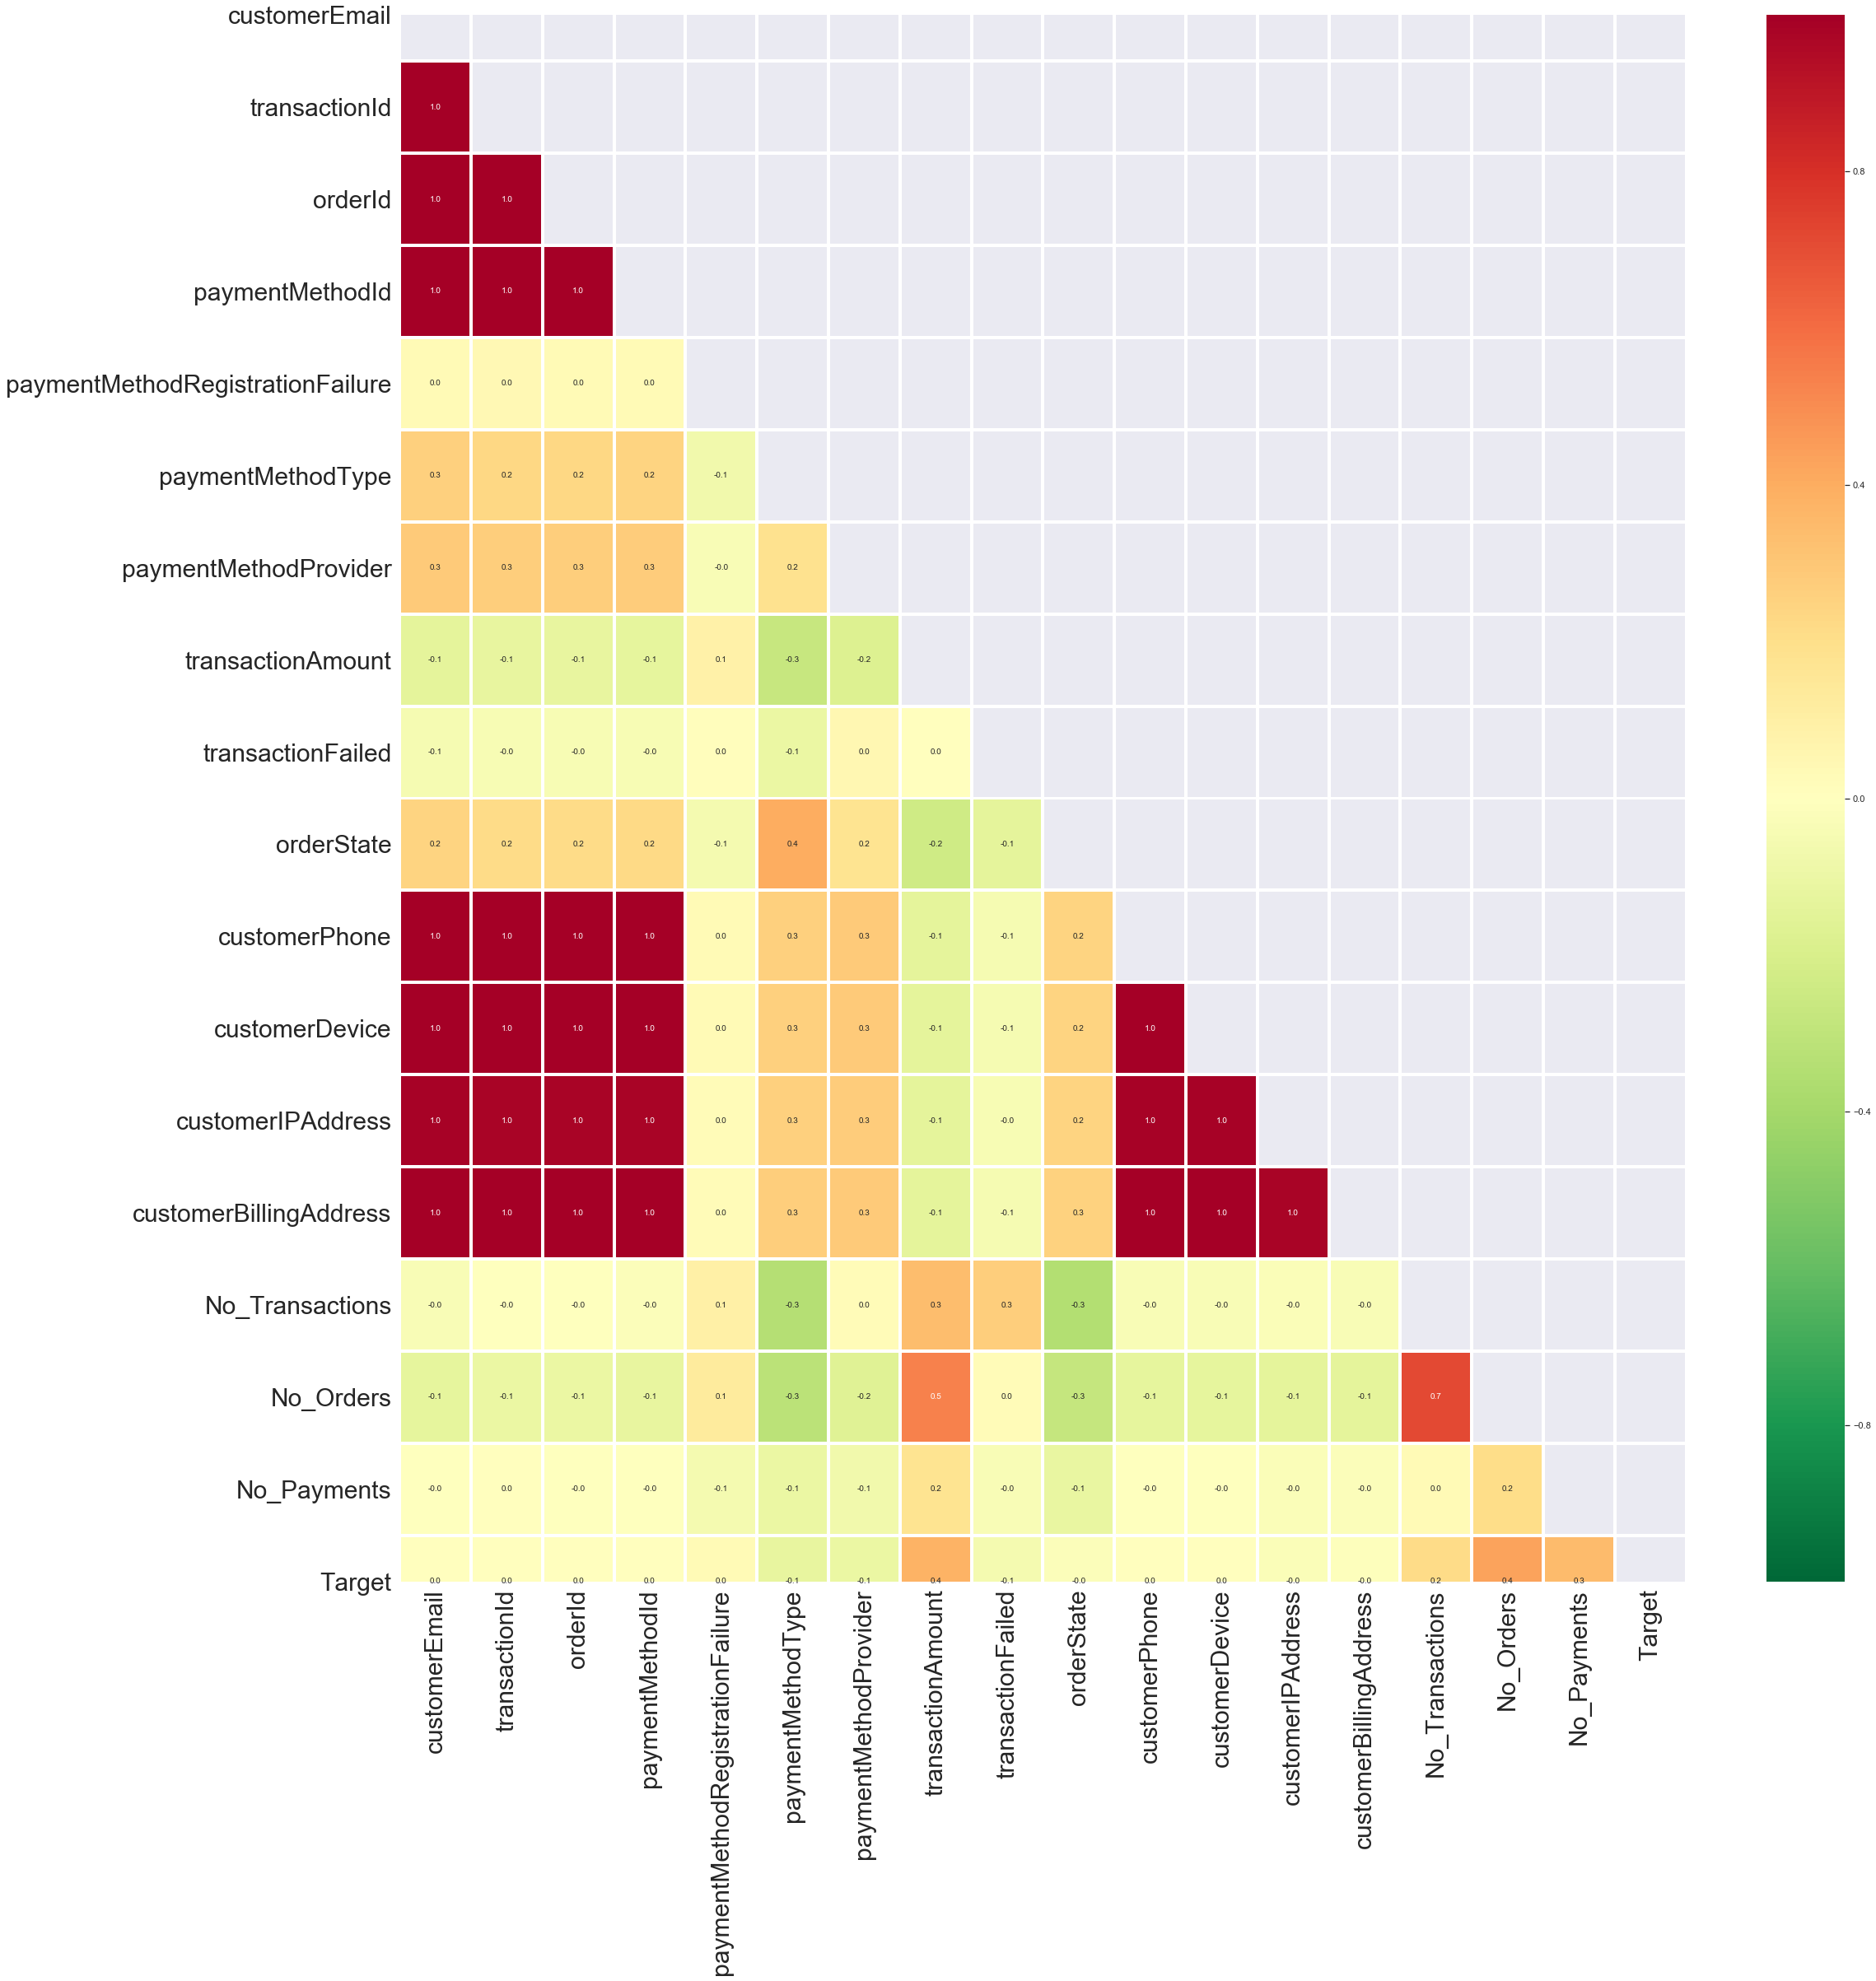

In [20]:
# a quick check the correlation
corr_df = df1.corr()

%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
print("          ------------------------------------------ Correlation Matrix ------------------------------------------")
print("Co-relation between features")
print("(greenish implies low significance while the reddish implies high significance)\nSEE Between target values and others")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
plt.figure(figsize=(35,35))
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1 ,mask = mask,  linewidths=3,fmt='.1f',annot=True)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0,fontsize=30) 
plt.xticks(rotation=90,fontsize=30) 
plt.show()

In [21]:
#Task 4:
#Construction of a model to predict if a customer is fraudulent based on their profile.

In [22]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
print("-----------------------Best Parameter search using Random and Grid Search----------------------- ")
# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

Automatically created module for IPython interactive environment
-----------------------Best Parameter search using Random and Grid Search----------------------- 
RandomizedSearchCV took 11.71 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.934 (std: 0.025)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.931 (std: 0.024)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_split': 3}

Model with rank: 3
Mean validation score: 0.928 (std: 0.024)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 4}

GridSearchCV took 36.96 seconds for 72 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.937 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'mi

In [27]:
#split data to train and test sets
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size = 0.2)

y = train["Target"]
X = train[features]

In [28]:
#using default parameters to build random forest model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted1 = clf.predict(X1)

print(metrics.classification_report(expected, predicted1))
print(metrics.confusion_matrix(expected, predicted1))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97        74
        True       0.98      0.93      0.95        56

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130

[[73  1]
 [ 4 52]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
# roc1 for default parameters
probas1_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate1, true_positive_rate1, thresholds = roc_curve(expected, probas1_[:, 1])
roc_auc1 = auc(false_positive_rate1, true_positive_rate1)
roc_auc1

0.9886583011583012

In [30]:
#use the best parameters found from RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=4, bootstrap= False, min_samples_split=4,
     max_depth=20, min_samples_leaf=3)
clf.fit(X, y)
from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted2 = clf.predict(X1)

print(metrics.classification_report(expected, predicted2))
print(metrics.confusion_matrix(expected, predicted2))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97        74
        True       0.98      0.95      0.96        56

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130

[[73  1]
 [ 3 53]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
# roc2 for RandomizedSearchCV
probas2_ = clf.fit(X, y).predict_proba(X1)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate2, true_positive_rate2, thresholds = roc_curve(expected,probas2_[:, 1])
roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
roc_auc2

0.9923986486486487

In [32]:
#use the best parameters from GridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', max_features=3, bootstrap= False, min_samples_split=2,
                             max_depth=20, min_samples_leaf=3)
clf.fit(X, y)

from sklearn import datasets
from sklearn import metrics   
expected = test["Target"]
X1 = test[features]
predicted3 = clf.predict(X1)

print(metrics.classification_report(expected, predicted3))
print(metrics.confusion_matrix(expected, predicted3))
#0 income<=50k
#1 income > 50k

              precision    recall  f1-score   support

       False       0.94      1.00      0.97        74
        True       1.00      0.91      0.95        56

    accuracy                           0.96       130
   macro avg       0.97      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130

[[74  0]
 [ 5 51]]


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
# roc GridSearchCV
probas3_ = clf.fit(X, y).predict_proba(X1)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate3, true_positive_rate3, thresholds = roc_curve(expected,probas3_[:, 1])
roc_auc3 = auc(false_positive_rate3, true_positive_rate3)
roc_auc3

0.9895028957528957

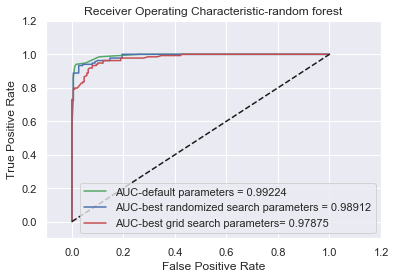

In [166]:
plt.title('Receiver Operating Characteristic-random forest')
plt.plot(false_positive_rate1, true_positive_rate1, 'g',
label='AUC-default parameters = %0.5f'% roc_auc1)


plt.plot(false_positive_rate2, true_positive_rate2, 'b',
label='AUC-best randomized search parameters = %0.5f'% roc_auc2)

plt.plot(false_positive_rate3, true_positive_rate3, 'r',
label='AUC-best grid search parameters= %0.5f'% roc_auc3)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [167]:
#Task 5:
#Report on the models success, showing what features are most important.

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 15 (0.189899)
2. feature 7 (0.116648)
3. feature 16 (0.092089)
4. feature 12 (0.089767)
5. feature 13 (0.078615)
6. feature 2 (0.074958)
7. feature 0 (0.072224)
8. feature 1 (0.069039)
9. feature 11 (0.049614)
10. feature 14 (0.048951)
11. feature 10 (0.046799)
12. feature 6 (0.028276)
13. feature 3 (0.024279)
14. feature 5 (0.012431)
15. feature 8 (0.003635)
16. feature 9 (0.001909)
17. feature 4 (0.000868)


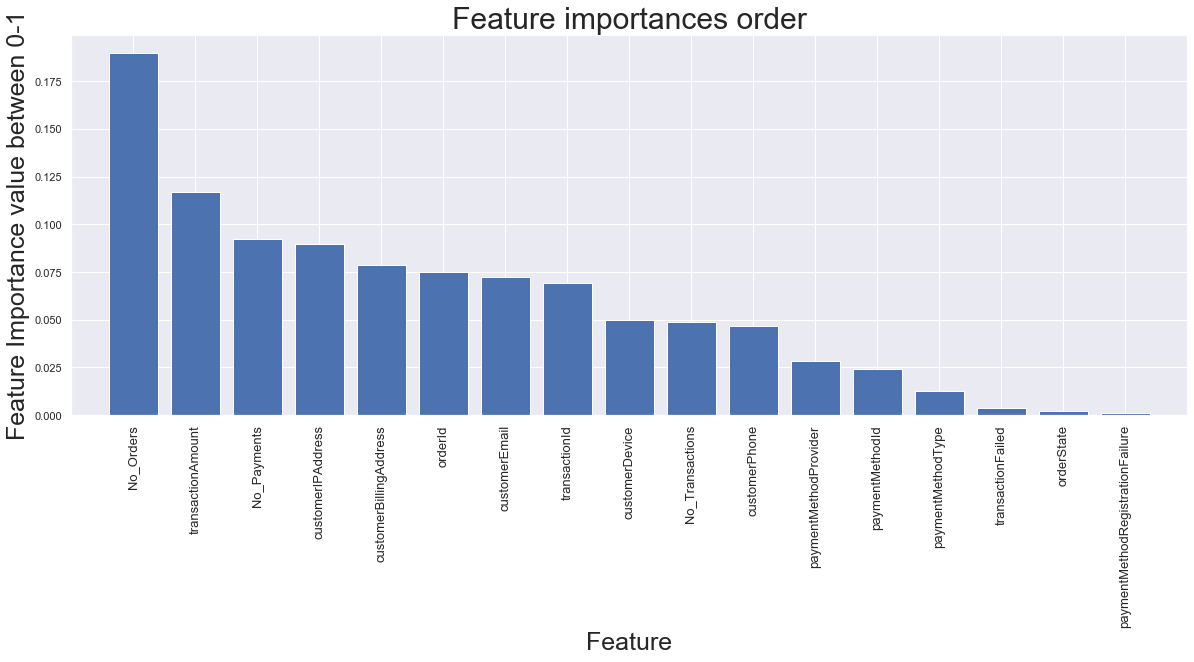

In [34]:
#find the importance ranking 
#use the best parameters from gridSearchCV
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy', max_features=3, bootstrap= False, min_samples_split=3,
                             max_depth=None, min_samples_leaf=10)


forest=clf.fit(X, y)

#label for x-axis
features_name = np.array(X.columns.values)
features_name

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances 
plt.figure(figsize=(20,7))
plt.title("Feature importances order",size=30)
plt.bar(range(X.shape[1]), importances[indices],
      yerr=std[indices], color='b' , align="center")
plt.xticks(range(X.shape[1]), features_name[indices],rotation=90,fontsize = 13)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature',size=25)
plt.ylabel('Feature Importance value between 0-1',size=25)
plt.show()


# CONCLUSION:
Exploratory analysis of the data:
The given dataset is a record of customers uniquely identified by their e-mails and their personal details and transactions they’ve made via different method providers and type which resulted in certain outcomes like order status no. of orders, payments, transactions and an attribute which says whether the customer is fraud or not.

On studying the data thoroughly and applying necessary operations certain observations were made such as,

1.	The customer detail table have 8 entries with same email. E-mail is a primary key hence should be unique, therefore keeping only first entry and removing other 7 to avoid data redundancy on merging the two tables.
2.	To have a better understanding of both data sets, additional columns have been added to customer table such has total transaction amount for each customer, no. of each payment method type used by customer, no. of each payment method provider used by customer, count of each order status of customers, failed transactions of each customer etc.
3.	The data contained out layers such as transaction amount of one customer was 358 exceptionally high than order transactions which may hamper our model’s prediction . So such out layers have been removed.

Summary of trends of data /visualisation and significant and insignificant factors of a fraud:

1.	Most of the not fraud customer uses “JCB 16 digit” and “Maestro” as the method provider while the fraud ones prefers “JCB 16 digit” and “VISA 16 digit”.
2.	Most of the not  fraud customers prefers “card” and “paypal” as payment method type whereas the fraud ones uses “card” and “bitcoin”.
3.	Most of the customers have fulfilled order state.
4.	In general, customers preferring bitcoin and apple pay as payment method types, VISA 13 digit and Voyager as payment method providers and have their orders fulfilled are most probable to be  a FRAUD.
5.	“PayPal” method type is highly secure, hence their user are generally not fraud.
6.	Average transaction of a total fraud customers is higher than not fraud. That implies a large amount transaction is suspicious always,
7.	Whereas, no. of orders, payments and transactions made by them which is quite obvious for a FRAUD.


An overview of model’s implementation and success percentages.

The problem statement demanded a predictive model on customers details and their transaction details predicting them being a fraud or not fraud.
Since, we’ve been given the labelled data so we proceeded with Supervised Learning. Problem statement demanded classification so I chose to use the most accurate and effective algorithm, Random Forest. Python provides a very comfortable and efficient platform for implementation of such glorious algorithms and also visualizations for better understanding.
Co-relation Matrix was used to identify the relations between pair of two attributes.
It started with importing some python defined algorithms from sklearn and under various modules like model_selection, ensemble, datssets.
•	from sklearn.model_selection import GridSearchCV
•	from sklearn.model_selection import RandomizedSearchCV
•	from sklearn.datasets import load_digits
•	from sklearn.ensemble import RandomForestClassifier
It started with splitting the dataset(merged) as test(0.2) and train(0.8).
Then, using 20 Decision trees under random forest to predict for the test data using the train data and showed the accuracy  result of top 3 decision tree models out of 20.
It was the first raw approach towards the prediction model which resulted in an accuracy of 98.86%
Now, to get the best accurate results and reduce the overfitting of data “Hyper Parameter Tuning” was must. So, by importing the GridSearchCV and RandomizedSearchCV algorithms from sklearn.model_selection two other models were prepared with enhanced accuracy rates as 98.95% and 99.24%  respectively.
Receiver Operating characteristic curves were plotted for all 3 Random forest models of True and False positive rates.
Lastly, by using GridSearchCV the best features or important features were identified.
 